In [1]:
# Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. 

In [2]:
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Iris=pd.read_csv(r"Iris.csv")
print(Iris)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [4]:
# Check for missing values
print(Iris.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [5]:
# Check for duplicate rows
print(Iris.duplicated().sum())




0


In [6]:
# Remove duplicate rows
df_duplicates_removed = Iris.drop_duplicates()

In [7]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
Iris.shape

(150, 6)

In [9]:
# Class distribution
print("Class Distribution:")
print(Iris['Species'].value_counts())

Class Distribution:
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


In [10]:
Iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
# Calculate the IQR
Q1 = Iris.quantile(0.25)
Q3 = Iris.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Id               74.5
SepalLengthCm     1.3
SepalWidthCm      0.5
PetalLengthCm     3.5
PetalWidthCm      1.5
dtype: float64


<AxesSubplot: xlabel='SepalWidthCm'>

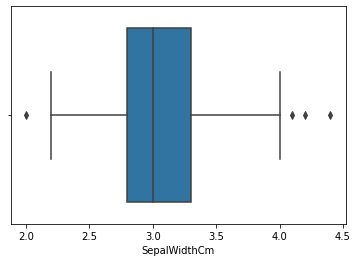

In [12]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='SepalWidthCm', data=Iris)


Old Shape:  (150, 6)
New Shape:  (146, 6)


<AxesSubplot: xlabel='SepalWidthCm'>

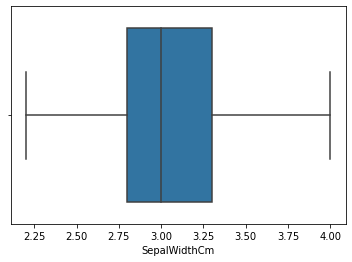

In [13]:
import numpy as np
# IQR
Q1 = np.percentile(Iris['SepalWidthCm'], 25,interpolation = 'midpoint')

Q3 = np.percentile(Iris['SepalWidthCm'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", Iris.shape)

# Upper bound
upper = np.where(Iris['SepalWidthCm'] >= (Q3+1.5*IQR))

# Lower bound
lower = np.where(Iris['SepalWidthCm'] <= (Q1-1.5*IQR))

# Removing the Outliers
Iris.drop(upper[0], inplace = True)
Iris.drop(lower[0], inplace = True)

print("New Shape: ", Iris.shape)

sns.boxplot(x='SepalWidthCm', data=Iris)


In [14]:
Iris.corr(method='pearson')


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.718722,-0.384320,0.880016,0.898193
SepalLengthCm,0.718722,1.000000,-0.113977,0.879374,0.822577
SepalWidthCm,-0.384320,-0.113977,1.000000,-0.397123,-0.329782
PetalLengthCm,0.880016,0.879374,-0.397123,1.000000,0.961755
PetalWidthCm,0.898193,0.822577,-0.329782,0.961755,1.000000


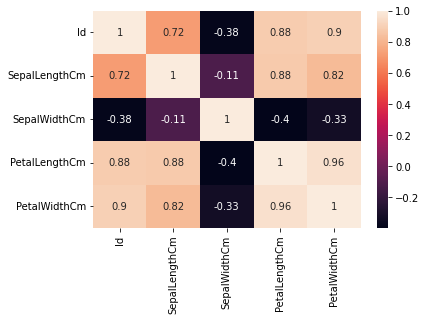

In [15]:
# Correlation heatmap
correlation = Iris.corr()
sns.heatmap(correlation, annot=True)
# Show the plots
plt.show()

In [16]:

Iris.drop(['Id','Species'], axis=1)
x=Iris.iloc[:,:-1].values
y = Iris['Species']

In [17]:
# Encode categorical variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(y)

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(x)
print(X)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[[-1.74537636 -0.9105154   1.1757891  -1.3748782  -1.34589856]
 [-1.72228394 -1.15112218 -0.09392398 -1.3748782  -1.34589856]
 [-1.69919151 -1.39172896  0.41396125 -1.43198551 -1.34589856]
 [-1.67609908 -1.51203236  0.16001863 -1.31777088 -1.34589856]
 [-1.65300665 -1.03081879  1.42973171 -1.3748782  -1.34589856]
 [-1.62991422 -0.54960522  2.19155956 -1.20355625 -1.08196143]
 [-1.60682179 -1.51203236  0.92184648 -1.3748782  -1.21392999]
 [-1.58372936 -1.03081879  0.92184648 -1.31777088 -1.34589856]
 [-1.56063694 -1.75263914 -0.3478666  -1.3748782  -1.34589856]
 [-1.53754451 -1.15112218  0.16001863 -1.31777088 -1.47786712]
 [-1.51445208 -0.54960522  1.68367433 -1.31777088 -1.34589856]
 [-1.49135

# SPLITTING THE IRIS DATA INTO TRAINING AND TESTING DATA

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the preprocessed data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (116, 5)
X_test shape: (30, 5)
y_train shape: (116,)
y_test shape: (30,)


# Create a Decision Tree classifier

In [19]:

model = DecisionTreeClassifier()


In [20]:
train_classifier=model.fit(X_train, y_train)

In [21]:
y_pred = train_classifier.predict(X_test)

# performance measure

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[12  0  0]
 [ 0  8  0]
 [ 0  1  9]]


In [23]:
from sklearn.metrics import accuracy_score
print("Accuracy : ", accuracy_score(y_test,y_pred))

Accuracy :  0.9666666666666667


# prediction with new data

In [24]:
new_df = pd.DataFrame({'Id':200,'SepalLengthCm':0.9,  'SepalWidthCm':0.1,  'PetalLengthCm':1.9,  'PetalWidthCm':4.0},index=[0])
new_pred1 = train_classifier.predict(new_df)
label_mapping = {
    0: 'Iris-Setosa',
    1: 'Iris-Versicolor',
    2: 'Iris-Virginica'
}

# Print the remapped predicted species
predicted_species = label_mapping[new_pred1[0]]
print(predicted_species)



Iris-Virginica


C:\Users\Gowtham Chandu\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


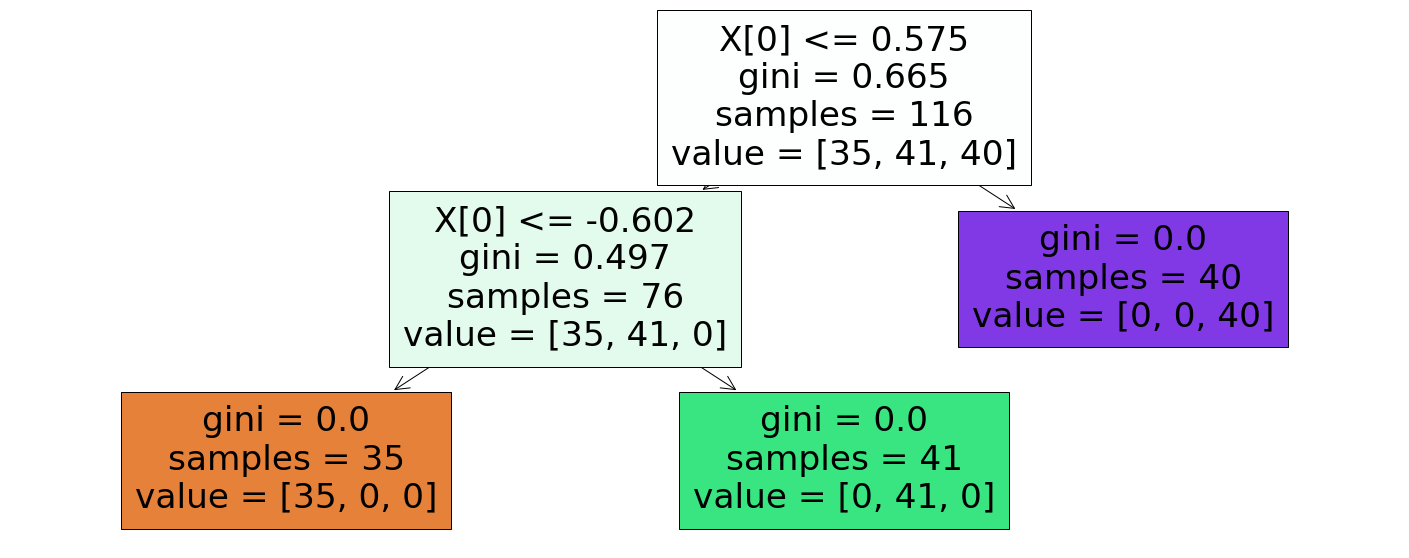

In [25]:

fig, ax = plt.subplots(figsize=(25,10))
tree.plot_tree(model, filled=True)
plt.show()